**классификатор LSTM на Keras+TensorFlow**

Евгений Борисов <borisov.e@solarl.ru>

In [1]:
import numpy as np
from numpy import random as rng

In [2]:
np.set_printoptions(precision=2) # вывод на печать до 2 знака

In [3]:
n_samples = 100 # количество примеров
seq_len = 3 # длина последовательности
code_len = 8 # размер элемента последовательности

# генерируем случайные примеры
x_train = rng.rand(n_samples,seq_len,code_len)
x_train.shape

(100, 3, 8)

In [4]:
x_train[:3,:]

array([[[0.31, 0.15, 0.7 , 0.31, 0.38, 0.45, 0.11, 0.44],
        [0.46, 0.37, 0.66, 0.07, 0.55, 0.46, 0.71, 0.49],
        [0.88, 0.26, 0.41, 0.11, 0.57, 0.67, 0.59, 0.87]],

       [[0.94, 0.64, 0.2 , 0.41, 0.48, 0.41, 0.08, 0.28],
        [0.02, 0.49, 0.68, 0.54, 0.66, 0.45, 0.99, 0.2 ],
        [0.09, 0.16, 0.15, 0.4 , 0.25, 0.16, 0.49, 0.91]],

       [[0.9 , 0.43, 0.6 , 0.91, 0.83, 0.13, 0.97, 0.6 ],
        [0.71, 0.67, 0.1 , 0.82, 0.82, 0.97, 0.91, 0.96],
        [0.07, 0.11, 0.21, 0.21, 0.31, 0.74, 0.53, 0.6 ]]])

In [5]:
n_classes = 5

# размечаем примеры случайным образом
target = rng.randint(0,n_classes,n_samples)
y_train = np.eye(n_classes)[target]

y_train.shape

(100, 5)

In [6]:
y_train[:3,:]

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

---

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense

In [8]:
model = Sequential()
model.add(LSTM(32, input_shape=(seq_len,code_len)))  
model.add(Dense(n_classes, activation='softmax'))

In [9]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [10]:
%%time

hist = model.fit(x_train, y_train, batch_size=32, epochs=600, validation_split=.2 )

Epoch 1/600
3/3 [==============================] - 23s 273ms/step - loss: 1.6288 - accuracy: 0.2500 - val_loss: 1.6498 - val_accuracy: 0.1500
Epoch 2/600
3/3 [==============================] - 0s 32ms/step - loss: 1.6170 - accuracy: 0.2383 - val_loss: 1.6458 - val_accuracy: 0.1500
Epoch 3/600
3/3 [==============================] - 0s 35ms/step - loss: 1.6138 - accuracy: 0.2086 - val_loss: 1.6412 - val_accuracy: 0.1500
Epoch 4/600
3/3 [==============================] - 0s 32ms/step - loss: 1.6010 - accuracy: 0.2281 - val_loss: 1.6384 - val_accuracy: 0.1500
Epoch 5/600
3/3 [==============================] - 0s 32ms/step - loss: 1.5920 - accuracy: 0.2437 - val_loss: 1.6366 - val_accuracy: 0.1500
Epoch 6/600
3/3 [==============================] - 0s 33ms/step - loss: 1.5863 - accuracy: 0.2633 - val_loss: 1.6345 - val_accuracy: 0.1500
Epoch 7/600
3/3 [==============================] - 0s 31ms/step - loss: 1.5881 - accuracy: 0.2484 - val_loss: 1.6319 - val_accuracy: 0.1500
Epoch 8/600
3/3 [=

3/3 [==============================] - 0s 33ms/step - loss: 1.4838 - accuracy: 0.3563 - val_loss: 1.6494 - val_accuracy: 0.1500
Epoch 60/600
3/3 [==============================] - 0s 33ms/step - loss: 1.4749 - accuracy: 0.3883 - val_loss: 1.6503 - val_accuracy: 0.1500
Epoch 61/600
3/3 [==============================] - 0s 31ms/step - loss: 1.4540 - accuracy: 0.3461 - val_loss: 1.6514 - val_accuracy: 0.1500
Epoch 62/600
3/3 [==============================] - 0s 31ms/step - loss: 1.4652 - accuracy: 0.3125 - val_loss: 1.6556 - val_accuracy: 0.1500
Epoch 63/600
3/3 [==============================] - 0s 31ms/step - loss: 1.4812 - accuracy: 0.2555 - val_loss: 1.6573 - val_accuracy: 0.1500
Epoch 64/600
3/3 [==============================] - 0s 31ms/step - loss: 1.4880 - accuracy: 0.2797 - val_loss: 1.6605 - val_accuracy: 0.2000
Epoch 65/600
3/3 [==============================] - 0s 30ms/step - loss: 1.4730 - accuracy: 0.3273 - val_loss: 1.6622 - val_accuracy: 0.2000
Epoch 66/600
3/3 [========

3/3 [==============================] - 0s 37ms/step - loss: 1.2691 - accuracy: 0.4219 - val_loss: 1.7071 - val_accuracy: 0.1000
Epoch 118/600
3/3 [==============================] - 0s 32ms/step - loss: 1.2772 - accuracy: 0.4141 - val_loss: 1.7016 - val_accuracy: 0.1000
Epoch 119/600
3/3 [==============================] - 0s 31ms/step - loss: 1.2799 - accuracy: 0.3781 - val_loss: 1.7015 - val_accuracy: 0.1000
Epoch 120/600
3/3 [==============================] - 0s 35ms/step - loss: 1.2730 - accuracy: 0.4273 - val_loss: 1.7102 - val_accuracy: 0.1000
Epoch 121/600
3/3 [==============================] - 0s 31ms/step - loss: 1.2925 - accuracy: 0.3586 - val_loss: 1.7177 - val_accuracy: 0.1000
Epoch 122/600
3/3 [==============================] - 0s 32ms/step - loss: 1.2330 - accuracy: 0.4414 - val_loss: 1.7325 - val_accuracy: 0.1000
Epoch 123/600
3/3 [==============================] - 0s 31ms/step - loss: 1.2074 - accuracy: 0.4813 - val_loss: 1.7329 - val_accuracy: 0.1000
Epoch 124/600
3/3 [=

Epoch 175/600
3/3 [==============================] - 0s 32ms/step - loss: 1.0561 - accuracy: 0.5852 - val_loss: 1.8583 - val_accuracy: 0.1500
Epoch 176/600
3/3 [==============================] - 0s 33ms/step - loss: 1.0856 - accuracy: 0.6008 - val_loss: 1.8524 - val_accuracy: 0.1500
Epoch 177/600
3/3 [==============================] - 0s 34ms/step - loss: 1.0759 - accuracy: 0.5805 - val_loss: 1.8548 - val_accuracy: 0.2000
Epoch 178/600
3/3 [==============================] - 0s 38ms/step - loss: 1.0420 - accuracy: 0.5789 - val_loss: 1.8552 - val_accuracy: 0.2000
Epoch 179/600
3/3 [==============================] - 0s 39ms/step - loss: 1.0771 - accuracy: 0.5828 - val_loss: 1.8543 - val_accuracy: 0.1500
Epoch 180/600
3/3 [==============================] - 0s 34ms/step - loss: 1.0818 - accuracy: 0.5852 - val_loss: 1.8597 - val_accuracy: 0.1500
Epoch 181/600
3/3 [==============================] - 0s 32ms/step - loss: 1.0331 - accuracy: 0.6242 - val_loss: 1.8671 - val_accuracy: 0.1500
Epoch 

Epoch 233/600
3/3 [==============================] - 0s 32ms/step - loss: 0.9201 - accuracy: 0.6875 - val_loss: 2.0031 - val_accuracy: 0.1500
Epoch 234/600
3/3 [==============================] - 0s 35ms/step - loss: 0.8963 - accuracy: 0.7148 - val_loss: 1.9922 - val_accuracy: 0.1500
Epoch 235/600
3/3 [==============================] - 0s 32ms/step - loss: 0.9368 - accuracy: 0.6461 - val_loss: 1.9901 - val_accuracy: 0.2500
Epoch 236/600
3/3 [==============================] - 0s 33ms/step - loss: 0.9022 - accuracy: 0.6414 - val_loss: 1.9980 - val_accuracy: 0.2500
Epoch 237/600
3/3 [==============================] - 0s 31ms/step - loss: 0.8738 - accuracy: 0.6555 - val_loss: 2.0131 - val_accuracy: 0.2500
Epoch 238/600
3/3 [==============================] - 0s 33ms/step - loss: 0.9273 - accuracy: 0.6516 - val_loss: 2.0204 - val_accuracy: 0.2000
Epoch 239/600
3/3 [==============================] - 0s 32ms/step - loss: 0.8689 - accuracy: 0.7133 - val_loss: 2.0337 - val_accuracy: 0.2000
Epoch 

Epoch 291/600
3/3 [==============================] - 0s 29ms/step - loss: 0.7193 - accuracy: 0.7266 - val_loss: 2.1290 - val_accuracy: 0.3000
Epoch 292/600
3/3 [==============================] - 0s 28ms/step - loss: 0.7221 - accuracy: 0.7719 - val_loss: 2.1316 - val_accuracy: 0.3000
Epoch 293/600
3/3 [==============================] - 0s 29ms/step - loss: 0.6941 - accuracy: 0.7719 - val_loss: 2.1298 - val_accuracy: 0.3000
Epoch 294/600
3/3 [==============================] - 0s 29ms/step - loss: 0.6927 - accuracy: 0.7797 - val_loss: 2.1334 - val_accuracy: 0.3000
Epoch 295/600
3/3 [==============================] - 0s 31ms/step - loss: 0.7395 - accuracy: 0.7406 - val_loss: 2.1313 - val_accuracy: 0.3000
Epoch 296/600
3/3 [==============================] - 0s 29ms/step - loss: 0.7249 - accuracy: 0.7562 - val_loss: 2.1373 - val_accuracy: 0.3000
Epoch 297/600
3/3 [==============================] - 0s 30ms/step - loss: 0.6904 - accuracy: 0.7641 - val_loss: 2.1380 - val_accuracy: 0.3000
Epoch 

Epoch 349/600
3/3 [==============================] - 0s 29ms/step - loss: 0.5257 - accuracy: 0.8484 - val_loss: 2.3343 - val_accuracy: 0.3000
Epoch 350/600
3/3 [==============================] - 0s 30ms/step - loss: 0.5348 - accuracy: 0.8445 - val_loss: 2.3262 - val_accuracy: 0.3000
Epoch 351/600
3/3 [==============================] - 0s 31ms/step - loss: 0.5436 - accuracy: 0.8313 - val_loss: 2.3194 - val_accuracy: 0.3000
Epoch 352/600
3/3 [==============================] - 0s 45ms/step - loss: 0.5414 - accuracy: 0.8570 - val_loss: 2.3222 - val_accuracy: 0.3000
Epoch 353/600
3/3 [==============================] - 0s 42ms/step - loss: 0.5220 - accuracy: 0.8688 - val_loss: 2.3171 - val_accuracy: 0.3000
Epoch 354/600
3/3 [==============================] - 0s 40ms/step - loss: 0.5420 - accuracy: 0.8469 - val_loss: 2.3184 - val_accuracy: 0.3000
Epoch 355/600
3/3 [==============================] - 0s 43ms/step - loss: 0.5332 - accuracy: 0.8609 - val_loss: 2.3207 - val_accuracy: 0.3000
Epoch 

Epoch 407/600
3/3 [==============================] - 0s 32ms/step - loss: 0.3727 - accuracy: 0.9313 - val_loss: 2.5709 - val_accuracy: 0.3500
Epoch 408/600
3/3 [==============================] - 0s 41ms/step - loss: 0.3886 - accuracy: 0.9156 - val_loss: 2.5687 - val_accuracy: 0.3500
Epoch 409/600
3/3 [==============================] - 0s 39ms/step - loss: 0.3815 - accuracy: 0.9234 - val_loss: 2.5612 - val_accuracy: 0.3000
Epoch 410/600
3/3 [==============================] - 0s 44ms/step - loss: 0.3824 - accuracy: 0.9313 - val_loss: 2.5565 - val_accuracy: 0.3000
Epoch 411/600
3/3 [==============================] - 0s 34ms/step - loss: 0.4022 - accuracy: 0.9117 - val_loss: 2.5588 - val_accuracy: 0.3500
Epoch 412/600
3/3 [==============================] - 0s 28ms/step - loss: 0.3877 - accuracy: 0.9234 - val_loss: 2.5697 - val_accuracy: 0.3500
Epoch 413/600
3/3 [==============================] - 0s 31ms/step - loss: 0.3957 - accuracy: 0.9375 - val_loss: 2.5699 - val_accuracy: 0.3500
Epoch 

Epoch 465/600
3/3 [==============================] - 0s 36ms/step - loss: 0.2644 - accuracy: 0.9617 - val_loss: 2.8576 - val_accuracy: 0.3000
Epoch 466/600
3/3 [==============================] - 0s 44ms/step - loss: 0.2533 - accuracy: 0.9617 - val_loss: 2.8598 - val_accuracy: 0.3000
Epoch 467/600
3/3 [==============================] - 0s 37ms/step - loss: 0.2679 - accuracy: 0.9461 - val_loss: 2.8652 - val_accuracy: 0.3000
Epoch 468/600
3/3 [==============================] - 0s 36ms/step - loss: 0.2527 - accuracy: 0.9695 - val_loss: 2.8840 - val_accuracy: 0.3000
Epoch 469/600
3/3 [==============================] - 0s 29ms/step - loss: 0.2585 - accuracy: 0.9656 - val_loss: 2.9011 - val_accuracy: 0.3000
Epoch 470/600
3/3 [==============================] - 0s 29ms/step - loss: 0.2526 - accuracy: 0.9656 - val_loss: 2.9088 - val_accuracy: 0.3000
Epoch 471/600
3/3 [==============================] - 0s 31ms/step - loss: 0.2734 - accuracy: 0.9539 - val_loss: 2.9214 - val_accuracy: 0.3000
Epoch 

Epoch 523/600
3/3 [==============================] - 0s 32ms/step - loss: 0.1708 - accuracy: 0.9938 - val_loss: 3.1705 - val_accuracy: 0.3000
Epoch 524/600
3/3 [==============================] - 0s 28ms/step - loss: 0.1747 - accuracy: 0.9820 - val_loss: 3.1627 - val_accuracy: 0.3000
Epoch 525/600
3/3 [==============================] - 0s 33ms/step - loss: 0.1672 - accuracy: 0.9938 - val_loss: 3.1566 - val_accuracy: 0.3000
Epoch 526/600
3/3 [==============================] - 0s 30ms/step - loss: 0.1687 - accuracy: 0.9820 - val_loss: 3.1677 - val_accuracy: 0.3000
Epoch 527/600
3/3 [==============================] - 0s 30ms/step - loss: 0.1578 - accuracy: 0.9938 - val_loss: 3.1814 - val_accuracy: 0.3000
Epoch 528/600
3/3 [==============================] - 0s 30ms/step - loss: 0.1610 - accuracy: 0.9820 - val_loss: 3.1944 - val_accuracy: 0.3000
Epoch 529/600
3/3 [==============================] - 0s 32ms/step - loss: 0.1711 - accuracy: 0.9820 - val_loss: 3.1963 - val_accuracy: 0.3000
Epoch 

Epoch 581/600
3/3 [==============================] - 0s 35ms/step - loss: 0.1020 - accuracy: 1.0000 - val_loss: 3.4102 - val_accuracy: 0.2500
Epoch 582/600
3/3 [==============================] - 0s 35ms/step - loss: 0.1150 - accuracy: 1.0000 - val_loss: 3.4101 - val_accuracy: 0.2500
Epoch 583/600
3/3 [==============================] - 0s 34ms/step - loss: 0.1055 - accuracy: 1.0000 - val_loss: 3.4136 - val_accuracy: 0.2500
Epoch 584/600
3/3 [==============================] - 0s 33ms/step - loss: 0.1091 - accuracy: 1.0000 - val_loss: 3.4202 - val_accuracy: 0.2500
Epoch 585/600
3/3 [==============================] - 0s 33ms/step - loss: 0.1062 - accuracy: 1.0000 - val_loss: 3.4306 - val_accuracy: 0.2500
Epoch 586/600
3/3 [==============================] - 0s 30ms/step - loss: 0.1008 - accuracy: 1.0000 - val_loss: 3.4463 - val_accuracy: 0.2500
Epoch 587/600
3/3 [==============================] - 0s 31ms/step - loss: 0.1120 - accuracy: 1.0000 - val_loss: 3.4511 - val_accuracy: 0.2500
Epoch 

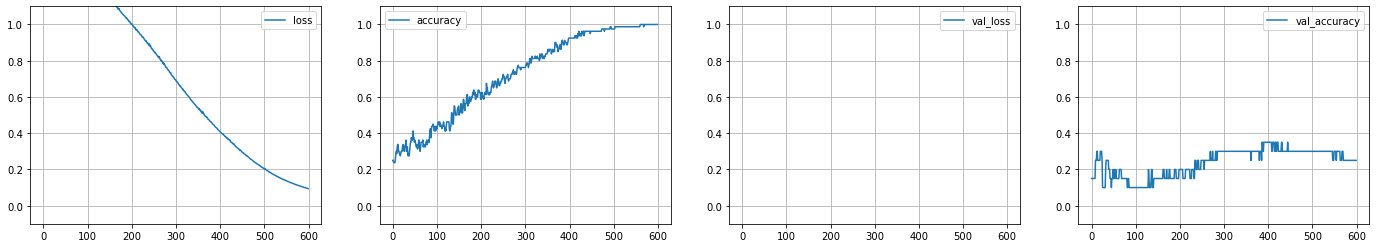

In [11]:
from matplotlib import pyplot as plt

k = hist.history.keys()

w,h = 6,4

fig,ax = plt.subplots(1,len(k),figsize=(w*len(k),h))
for i,n in enumerate(k):
    ax[i].plot(hist.history[n],label=n)
    ax[i].grid(True)
    ax[i].legend()
    ax[i].set_ylim([-.1,1.1])